# Проект: Статистический анализ данных

**Цель исследования:** Проанализировать данные и проверить некоторые гипотизы, которые помогут бизнесу вырасти.

Иследование будет проводиться на данных, предоставленных сервисом аренды самокатов GoFast.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
  
  
- с подпиской Ultra
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.

**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — *users_go.csv*
- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age - возраст
- city - город
- subscription_type - тип подписки (free, ultra)

Поездки — *rides_go.csv*
- user_id - уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки

Подписки — *subscriptions_go.csv*
- subscription_type - тип подписки
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа

Подключаем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
print(users_go.head())
users_go.info()

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
print(rides_go.head())
rides_go.info()

   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [5]:
print(subscriptions_go.head())
subscriptions_go.info()

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В итоге мы загрузили данные, теперь каждая таблица в своей переменной, и просмотрели первый строки этих таблиц и общую информацию. На первый взгляд нужно изменить тип данных столбца 'data' в датафрейме rides_go.

Перейдём к предобработке данных.

#### Шаг 2. Предобработка данных

Первым делом сменим тип данных в столбце 'data' на datetime64.

In [6]:
rides_go['date'] = pd.to_datetime(
    rides_go['date'], format='%Y-%m-%d'
)
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Теперь добавим новый столбец в DataFrame rides_go, в котором будут указаны номера месяца для каждой поездки, и назовём его 'number_month'.

In [7]:
rides_go['number_month'] = rides_go['date'].dt.month
rides_go.head()

,user_id,distance,duration,date,number_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Далее проведем проверку на наличие явных дупликатов в датафреймах rides_go и users_go, subscriptions_go трогать не будем, так как там болько 2 строчки.

In [8]:
rides_go.duplicated().sum()

0

In [9]:
users_go.duplicated().sum()

31

In [10]:
users_go = users_go.drop_duplicates()
users_go.duplicated().sum()

0

В результате проверки был выявлен 31 дупликат в users_go, избавились от них с помощью метода drop_duplicates().

Далее проверим те же датафреймы на наличие неявных дупликатов.

In [11]:
users_go['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [12]:
users_go['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

По результатам проверки неявных дупликатов не было обнаружено.

Теперь стоит проверить наличие пропусков в этих датафреймах.

In [13]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
rides_go.isna().sum()

user_id         0
distance        0
duration        0
date            0
number_month    0
dtype: int64

Пропуски также отсутствуют.

**Вывод** 

В разделе предобработка данных были выполнены следующие манипуляции:
- изменение типа данных столбца 'date' на datetime64;
- был добавлен новый столбец в DataFrame rides_go, в котором указаны номера месяца для каждой поездки
- данные были проверены на наличие явных и неявных дупликатов, в результате в одном из датафреймов были обнаружены явные дупликаты, после чего они были удалены
- данные были проверены на наличие пропусков

In [15]:
rides_go['date'].max() - rides_go['date'].min()

Timedelta('363 days 00:00:00')

In [16]:
rides_go['distance'] = rides_go['distance'].round()
rides_go['distance'].describe()

count    18068.000000
mean      3070.659010
std       1116.832209
min          1.000000
25%       2543.000000
50%       3134.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

In [17]:
x = rides_go.groupby('distance')['distance'].count()
x[x>14]

distance
2690.0    15
2788.0    16
2923.0    16
2998.0    17
3021.0    15
3054.0    15
3115.0    18
3131.0    15
3153.0    16
3155.0    15
3163.0    17
3251.0    15
3272.0    19
3337.0    15
3359.0    17
3393.0    17
Name: distance, dtype: int64

In [18]:
x

distance
1.0       1
3.0       1
4.0       1
7.0       2
11.0      1
         ..
6725.0    1
6761.0    1
6908.0    1
7066.0    1
7211.0    1
Name: distance, Length: 4608, dtype: int64

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Комментарий студента</b> 

Данные предоставлены за периоды 363 дня, значит проблем с месяцами не должно быть.
    
В результате проверки столбца 'distance' к аномалиям можно отнести маленькое расстояние поездки (1, 3, 4, 7 метров и тд). В остальном аномалии отсутсвуют (нет отрицательных значений, есть повторения значений, но они присутствуют ближе к среднему, где большое скопление значений).
</div>

#### Шаг 3. Исследовательский анализ данных

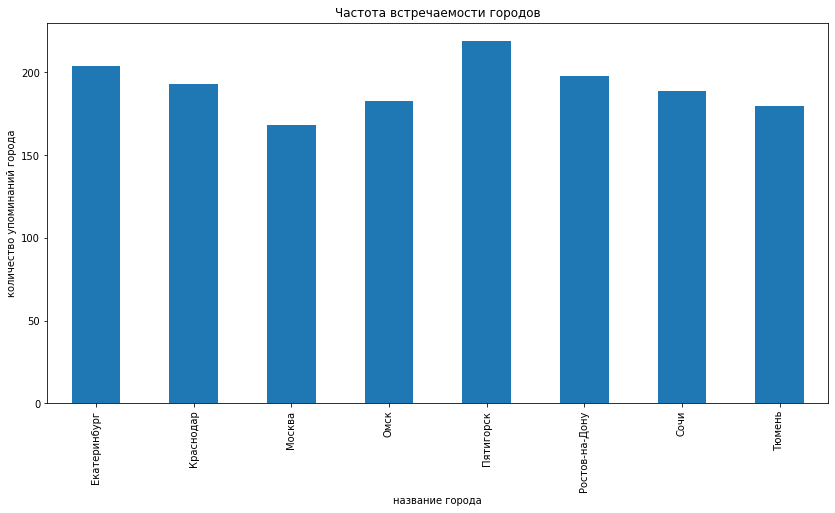

In [19]:
#частота встречаемости городов
users_go.groupby('city')['city'].count().plot(kind='bar', figsize=(14, 7))
plt.title('Частота встречаемости городов')
plt.xlabel('название города')
plt.ylabel('количество упоминаний города')
plt.show()

In [20]:
(users_go.groupby('city')['city'].count()/users_go['city'].count()).sort_values(ascending = False)

city
Пятигорск         0.142764
Екатеринбург      0.132986
Ростов-на-Дону    0.129074
Краснодар         0.125815
Сочи              0.123207
Омск              0.119296
Тюмень            0.117340
Москва            0.109518
Name: city, dtype: float64

In [21]:
users_go.groupby('subscription_type')['subscription_type'].count()

subscription_type
free     835
ultra    699
Name: subscription_type, dtype: int64

In [22]:
#доля пользователей с подпиской и без подписки
ultra = users_go.loc[users_go['subscription_type'] == 'ultra', 'subscription_type'].count()/users_go['subscription_type'].count()
free = users_go.loc[users_go['subscription_type'] == 'free', 'subscription_type'].count()/users_go['subscription_type'].count()
print('Доля пользователей с подпиской: ', ultra)
print('Доля пользователей без подписки: ', free)

Доля пользователей с подпиской:  0.4556714471968709
Доля пользователей без подписки:  0.5443285528031291


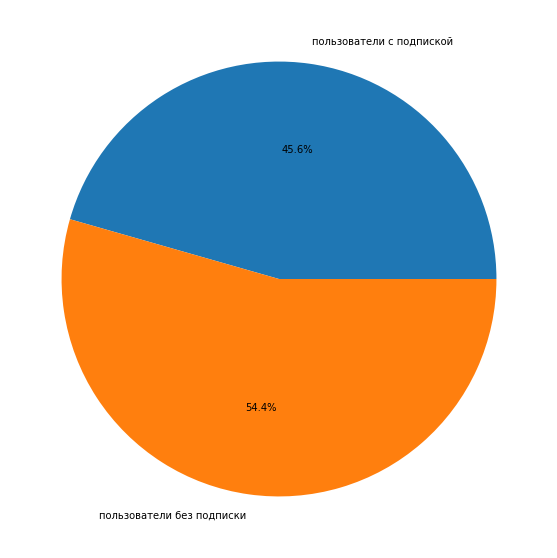

In [23]:
fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.pie([ultra, free], labels=['пользователи с подпиской', 'пользователи без подписки'], autopct='%1.1f%%')
plt.show()

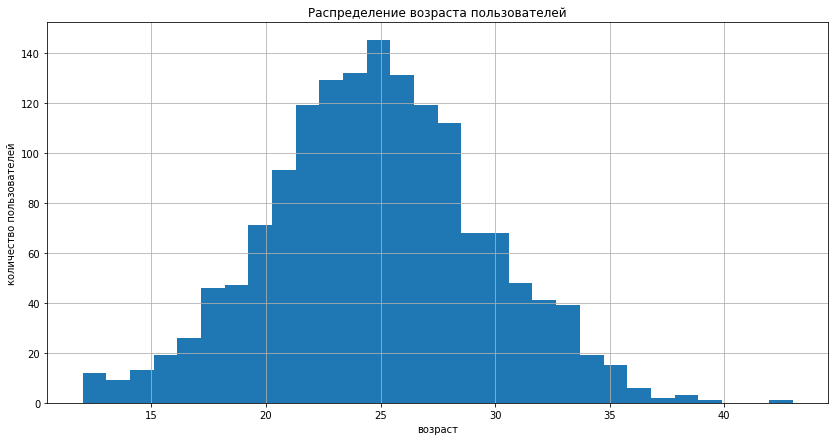

In [24]:
#возраст пользователей
users_go['age'].hist(bins = 30, figsize=(14, 7))
plt.title('Распределение возраста пользователей')
plt.xlabel('возраст')
plt.ylabel('количество пользователей')
plt.show()

In [25]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

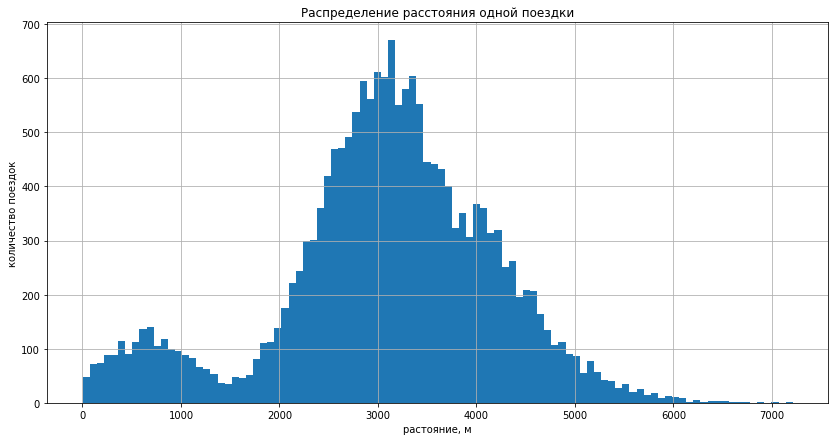

In [26]:
#дистанция, которую проехал пользователь за одну поездку
rides_go['distance'].hist(bins = 100, figsize=(14, 7))
plt.title('Распределение расстояния одной поездки')
plt.xlabel('растояние, м')
plt.ylabel('количество поездок')
plt.show()

In [27]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659010
std       1116.832209
min          1.000000
25%       2543.000000
50%       3134.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

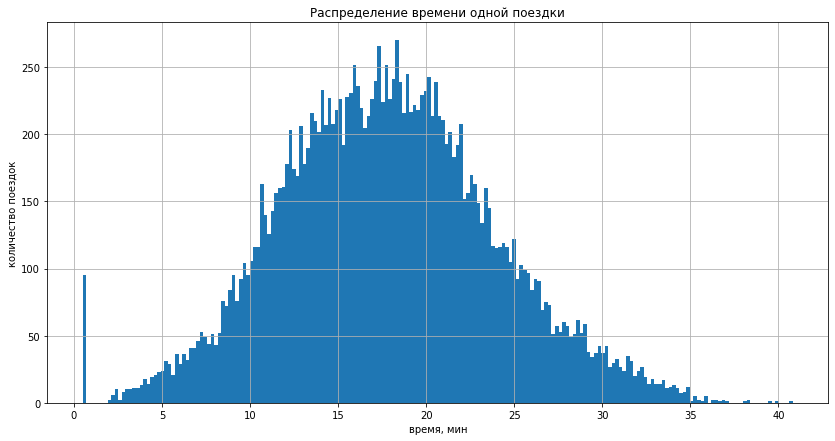

In [28]:
#время поездки пользователя
rides_go['duration'].hist(bins = 200, figsize=(14, 7))
plt.title('Распределение времени одной поездки')
plt.xlabel('время, мин')
plt.ylabel('количество поездок')
plt.show()

In [29]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [30]:
rides_go.groupby('duration')['duration'].count()

duration
0.500000     95
2.035632      1
2.053251      1
2.180879      1
2.222598      1
             ..
38.265229     1
38.352763     1
39.526602     1
39.873856     1
40.823963     1
Name: duration, Length: 17974, dtype: int64

**Вывод**

- При оценке частоты встречаемости городов по графику можно заметить, что уровень встречаемость приблизительно одинаковый для всех городов. Пятигорск встречается чаще, чем остальные, и составляет 0.142764 от всех городов, а Москва меньше всего - 0.109518.
- Соотношение пользователей с подпиской и без подписки составляет 0.837125748502994, значит пользователей без подписки больше.
- Судя по гистограмме больше всего пользователей в возрасте 25 лет, самый минимальный возраст составляет 12 лет, а самый максимальный 43 года. Также можно заметить, что гистограмма по возрасту пользователей подчиняется нормальному распределению.
- По гистограмме расстояния одной поездки можно заметить две возвышенности, первая небольшая с пиком около 600 метров, а вторая возвышенность достаточно большая и её пик находится примерно на уровне 3000 метров. Также можно заметить, что гистограмма подчиняется нормальному закону рапределения.
- Судя по гистограмме времени поездки пользователя, среднее время поездки составляет около 17 минут - это пик гистограммы. Есть странные значение равные 0.5 их 95 штук, что указывает на аномалию.

#### Шаг 4. Объединение данных

Объединим данные в таблицах rides_go, users_go и subscriptions_go методом merge().

In [31]:
new_data = rides_go.merge(users_go).merge(subscriptions_go)
new_data

,user_id,distance,duration,date,number_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4410.0,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2618.0,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.0,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2695.0,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4029.0,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.0,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.0,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.0,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.0,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [32]:
do_preobr_rides = rides_go.shape
do_preobr_users = users_go.shape
do_preobr_subscriptions = subscriptions_go.shape
posle_preobr = new_data.shape
print('До преобразования "rides_go": ',do_preobr_rides)
print('До преобразования "users_go": ',do_preobr_users)
print('До преобразования "subscriptions_go": ',do_preobr_subscriptions)
print('После преобразования: ',posle_preobr)

До преобразования "rides_go":  (18068, 5)
До преобразования "users_go":  (1534, 5)
До преобразования "subscriptions_go":  (2, 4)
После преобразования:  (18068, 12)


In [33]:
new_data.isna().sum()

user_id              0
distance             0
duration             0
date                 0
number_month         0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Комментарий студента</b> 
    
В результате объединения таблиц был получен датасет с количеством строк равным изначальному датасету, к которому присоединяли остальные таблицы (18068). А количество с столбцов с каждом объединение увеличивалось. После объединения таблиц rides_go и users_go количество столбцов стало равным 9 (один столбец общий, по нему происходило объединение user_id). После объединения датасета из предыдущего шага и subscriptions_go количество столбцов стало равным 12, также есть один общий столбец (subscription_type).
    
После объединения пропуски отсутствуют.
</div>

Разделим получившийся датафрейм на 2: c данными о пользователях без подписки, с данными о пользователях с подпиской.

In [34]:
#с данными о пользователях с подпиской
data_ultra = new_data[new_data['subscription_type'] == 'ultra']
data_ultra = data_ultra.reset_index(drop=True)
#с данными о пользователях без подписки
data_free = new_data[new_data['subscription_type'] == 'free']
data_free = data_free.reset_index(drop=True)
display(data_ultra.head())
display(data_free.head())

,user_id,distance,duration,date,number_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4410.0,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2618.0,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.0,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2695.0,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4029.0,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


,user_id,distance,duration,date,number_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,2516.0,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,847.0,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,4004.0,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,1206.0,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,3047.0,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


Теперь визуализируем время и дистанцию поездок для каждого датафрейма и сравним их.

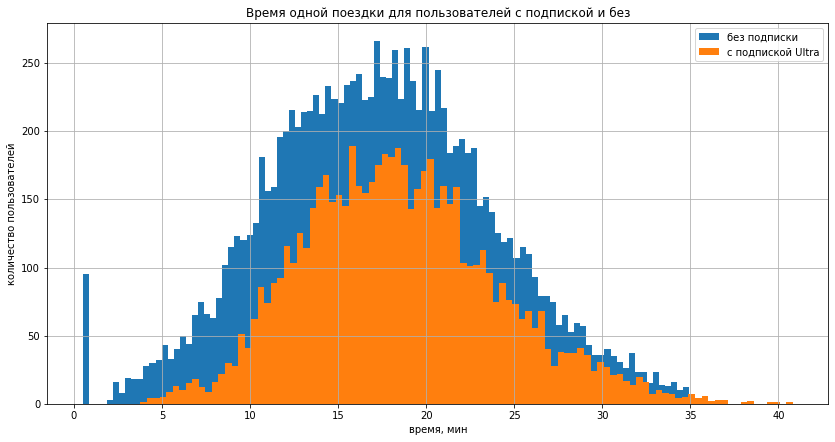

In [35]:
data_free['duration'].plot(kind = 'hist', grid=True, figsize = (14,7), bins = 100, label='без подписки')
data_ultra['duration'].plot(kind = 'hist', grid=True, figsize = (14,7), bins = 100, label='с подпиской Ultra')
plt.title('Время одной поездки для пользователей с подпиской и без')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

In [36]:
print("Для датасета с подпиской")
print(data_ultra['duration'].describe(),'\n')
print("Для датасета без подпиской")
print(data_free['duration'].describe())

Для датасета с подпиской
count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64 

Для датасета без подпиской
count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


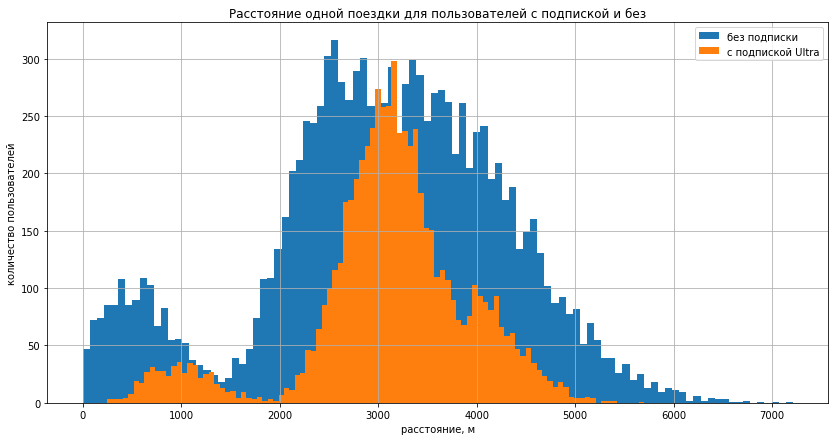

In [37]:
data_free['distance'].plot(kind = 'hist', grid=True, figsize = (14,7), bins = 100, label='без подписки')
data_ultra['distance'].plot(kind = 'hist', grid=True, figsize = (14,7), bins = 100, label='с подпиской Ultra')
plt.title('Расстояние одной поездки для пользователей с подпиской и без')
plt.xlabel('расстояние, м')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

In [38]:
print("Для датасета с подпиской")
print(data_ultra['distance'].describe(),'\n')
print("Для датасета без подпиской")
print(data_free['distance'].describe())

Для датасета с подпиской
count    6500.000000
mean     3115.443385
std       836.898137
min       244.000000
25%      2785.000000
50%      3149.000000
75%      3561.000000
max      5700.000000
Name: distance, dtype: float64 

Для датасета без подпиской
count    11568.00000
mean      3045.49490
std       1246.17418
min          1.00000
25%       2367.00000
50%       3115.00000
75%       3906.00000
max       7211.00000
Name: distance, dtype: float64


**Вывод**
- Были объединены все 3 датасета в один
- Были получены два новых датасета пользователей с подпиской и без подписки
- Были визуализированы данные для времени и расстояния поездки для двух датасетов. По полученным графикам сразу можно сделать вывод, что аномальные значения 0.5 для времени находятся в датасете с людьми без подписки. Также разброс данных для людей без подписки больше, как и само количество поездок.

#### Шаг 5. Подсчёт выручки

Найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [39]:
data = new_data.pivot_table(index= ['user_id', 'number_month'], values = ['minute_price', 'start_ride_price', 'subscription_fee', 'distance', 'duration'], aggfunc = ['count', 'sum', 'mean'])
data.columns = ["_".join((j,k)) for j,k in data.columns]
data = data.drop(['count_distance','count_minute_price','count_start_ride_price','count_subscription_fee', 'sum_minute_price', 'sum_start_ride_price', 'sum_subscription_fee', 'mean_distance', 'mean_duration'], axis=1)
data = data.rename(columns = {'count_duration': 'count_of_trips','mean_minute_price':'minute_price','mean_start_ride_price':'start_ride_price','mean_subscription_fee':'subscription_fee'})
data.loc[data['subscription_fee'] == 199, 'tariff'] = 'ultra'
data.loc[data['subscription_fee'] == 0, 'tariff'] = 'free'
data['sum_duration'] = np.ceil(data['sum_duration']).astype('int')
data

count_of_trips  sum_distance  sum_duration  \
user_id number_month                                               
1       1                          2        7028.0            42   
        4                          1         754.0             7   
        8                          2        6724.0            45   
        10                         2        5810.0            32   
        11                         3        7004.0            54   
...                              ...           ...           ...   
1534    6                          2        3409.0            25   
        8                          2        7623.0            48   
        9                          1        4928.0            23   
        11                         4       13349.0            77   
        12                         1        2372.0            16   

                      minute_price  start_ride_price  subscription_fee tariff  
user_id number_month                                                           
1       1                        6                 0               199  ultra  
        4                        6                 0               199  ultra  
        8                        6                 0               199  ultra  
        10                       6                 0               199  ultra  
        11                       6                 0               199  ultra  
...                            ...               ...               ...    ...  
1534    6                        8                50                 0   free  
        8                        8                50                 0   free  
        9                        8                50                 0   free  
        11                       8                50                 0   free  
        12                       8                50                 0   free  

[11331 rows x 7 columns]

Также были добавлены столбцы с информацией о тарифах для людей с подпиской и без подписки.

Далее высчитаем помесячную выручку для каждого пользователя.

In [40]:
data['month_revenue'] = (data['count_of_trips']*data['start_ride_price']
                                                   +data['minute_price']*data['sum_duration']
                                                   +data['subscription_fee'])
data

count_of_trips  sum_distance  sum_duration  \
user_id number_month                                               
1       1                          2        7028.0            42   
        4                          1         754.0             7   
        8                          2        6724.0            45   
        10                         2        5810.0            32   
        11                         3        7004.0            54   
...                              ...           ...           ...   
1534    6                          2        3409.0            25   
        8                          2        7623.0            48   
        9                          1        4928.0            23   
        11                         4       13349.0            77   
        12                         1        2372.0            16   

                      minute_price  start_ride_price  subscription_fee tariff  \
user_id number_month                                                            
1       1                        6                 0               199  ultra   
        4                        6                 0               199  ultra   
        8                        6                 0               199  ultra   
        10                       6                 0               199  ultra   
        11                       6                 0               199  ultra   
...                            ...               ...               ...    ...   
1534    6                        8                50                 0   free   
        8                        8                50                 0   free   
        9                        8                50                 0   free   
        11                       8                50                 0   free   
        12                       8                50                 0   free   

                      month_revenue  
user_id number_month                 
1       1                       451  
        4                       241  
        8                       469  
        10                      391  
        11                      523  
...                             ...  
1534    6                       300  
        8                       484  
        9                       234  
        11                      816  
        12                      178  

[11331 rows x 8 columns]

#### Шаг 6. Проверка гипотез

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**H0** Среднее время поездки у пользователей с подпиской меньше или равно, чем середнее пользователей без подписки

**H1** Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки

In [41]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(data_free['duration'], data_ultra['duration'], alternative='less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:** Таким образом, мы отвергаем нулевую гипотизу, из чего делаем вывод, что пользователи с подпиской и правда тратят больше времени на поездки.

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

**H0** Значение среднего выборки расстояний одной поездки пользователей с подпиской меньше или равно значению 3130

**H1** Значение среднего выборки расстояний одной поездки пользователей с подпиской больше значения 3130

In [42]:
sred = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(data_ultra['distance'], sred, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195649894697724
Не отвергаем нулевую гипотезу


**Вывод:** Таким образом, мы не смогли отвергнуть нулевую гипотизу, из чего делаем вывод, что пользователи с подпиской за одну поездку проезжают не более 3130 метров.

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

**H0** Значение среднего выборки помесячной выручки от пользователей с подпиской меньше или равно, чем от пользователей без подписки

**H1** Значение среднего выборки помесячной выручки от пользователей с подпиской больше, чем от пользователей без подписки

In [43]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(data.loc[data['tariff'] == 'ultra', 'month_revenue'], data.loc[data['tariff'] == 'free', 'month_revenue'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8130926188487286e-35
Отвергаем нулевую гипотезу


**Вывод:** Таким образом, мы отвергаем нулевую гипотизу, из чего делаем вывод, что пользователи с подпиской приносят больше выручки.

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ**

Для проверки данной гипотезы нам понадобился бы тест для проверки равенства средних для зависимых (парных) выборок.

Гипотезы в таком случае будут сформулированы так:

H0: μ1<=μ2

H1: μ1>μ2

где μ1 и μ2 - средние значения до и после изменений.

Для этого используется метод scipy.stats.ttest_rel(), в котором слкдующие параметра: выборка до изменения и выборка после изменения, парметр альтернативной гипотезы 'less'.

**Вывод**

Результаты предобработки данных.
- изменение типа данных столбца 'date' на datetime64;
- был добавлен новый столбец в DataFrame rides_go, в котором указаны номера месяца для каждой поездки
- данные были проверены на наличие явных и неявных дупликатов, в результате в одном из датафреймов были обнаружены явные дупликаты, после чего они были удалены
- данны были проверены на наличие аномалий
- данные были проверены на наличие пропусков (пропуски не обнаружены)

Результаты анализа.
- При оценке частоты встречаемости городов по графику можно заметить, что уровень встречаемость приблизительно одинаковый для всех городов. Пятигорск встречается чаще, чем остальные, и составляет 0.142764 от всех городов, а Москва меньше всего - 0.109518.
- Доля пользователей с подпиской составляет 45,6%, а доля пользователей 54,4% (пользователей с подпиской больше).
- Судя по гистограмме больше всего пользователей в возрасте 25 лет, самый минимальный возраст составляет 12 лет, а самый максимальный 43 года. Также можно заметить, что гистограмма по возрасту пользователей подчиняется нормальному распределению.
- По гистограмме расстояния одной поездки можно заметить две возвышенности, первая небольшая с пиком около 600 метров, а вторая возвышенность достаточно большая и её пик находится примерно на уровне 3000 метров. Также можно заметить, что гистограмма подчиняется нормальному закону рапределения.
- Судя по гистограмме времени поездки пользователя, среднее время поездки составляет около 17 минут - это пик гистограммы. Есть странные значение равные 0.5 их 95 штук, что указывает на аномалию.

Результаты объединения данных.
- Были объединены все 3 датасета в один
- Были получены два новых датасета пользователей с подпиской и без подписки из датасета образованного в прошлом пункте
- Были визуализированы данные для времени и расстояния поездки для двух датасетов. По полученным графикам сразу можно сделать вывод, что аномальные значения 0.5 для времени находятся в датасете с людьми без подписки. Также разброс данных для людей без подписки больше, как и само количество поездок.

Результат подсчёта выручки.
- Была сформирована новая таблица с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц.
- Также были добавлены столбцы с информацией о тарифах для людей с подпиской и без подписки.
- Была высчитана помесячная выручка для каждого пользователя и записана в новый столбец.

Результат проверки гипотез.

Была проведена проверка некоторых гипотез, по результатам которых можно сделать вывод, что пользователи с подпиской выгоднее для сервиса аренды самокатов GoFast (такие пользователи приносят больше выручки, чем пользователи без подписки, при этом дистанция одной поездки не привышает 3130 метро, тем самым дольше оставляя самокаты в рабочем состоянии).

<b>Таким образом, </b> стоит привлекать пользователей к подключению подписку, так как это выгоднее для сервиса. На данный момент более чем у половины пользователей отсутствует подписка. Стоит учитывать, что большая часть пользователей имеет возраст в районе 25 лет и что чем теплее климат в городе, тем чаще пользователи используют самокаты для передвижения.